In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [6]:
import os
# set the notebook parent directory as the working directory
os.chdir(os.path.dirname(os.getcwd()))
print(os.getcwd())

/Users/Placebo/OMSCS/CS7641-ML/MachineLearningProjects/Classification


# Dataset1: Bank Marketing

In [7]:
data_raw = pd.read_csv('data/dataset1/raw/Bank_Campaign.csv', sep=';')
print('Data shape:', data_raw.shape)
data_raw.head()

Data shape: (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
data_raw.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
data_raw.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,subscribed
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


## Target distribution

In [11]:
data_raw['subscribed'].value_counts()

no     36548
yes     4640
Name: subscribed, dtype: int64

In [12]:
4640/(36548+4640)

0.11265417111780131

## Feature Study
In this section, we need to look into the continuous variable and categorical variable distribution. 

In [13]:
cont_vars = ['age',  'duration', 'campaign', 'pdays', 'previous',  'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
cate_vars = ['job', 'marital', 'education', 'day_of_week','default', 'housing', 'loan', 'contact', 'month','poutcome']


In [21]:
def set_plot_style():
    plt.style.use('default')
    sns.set_style("whitegrid")
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.rcParams['font.size'] = 15
    plt.rcParams['axes.labelsize'] = 18
    plt.rcParams['axes.titlesize'] = 20
    plt.rcParams['xtick.labelsize'] = 15
    plt.rcParams['ytick.labelsize'] = 15
    plt.rcParams['legend.fontsize'] = 15
    plt.rcParams['figure.facecolor'] = 'white'

def plot_continuous(df, column):
    set_plot_style()
    plt.figure(figsize=(12, 4))
    
    # histogram
    plt.subplot(121)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    
    # boxplot
    plt.subplot(122)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()
    
def plot_categorical(df, column):
    set_plot_style()
    plt.figure(figsize=(12, 4))
    
    # countplot
    plt.subplot(121)
    df[column].value_counts().plot(kind='bar')
    plt.title(f'Countplot of {column}')
    plt.xticks(rotation=45)
    
    # pie chart
    plt.subplot(122)
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Pie chart of {column}')
    
    plt.tight_layout()
    plt.show()

### Continuous Variables

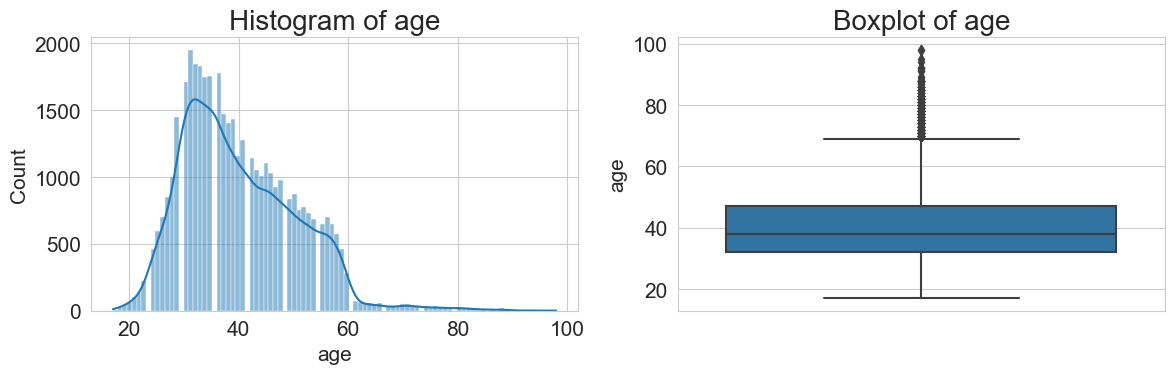

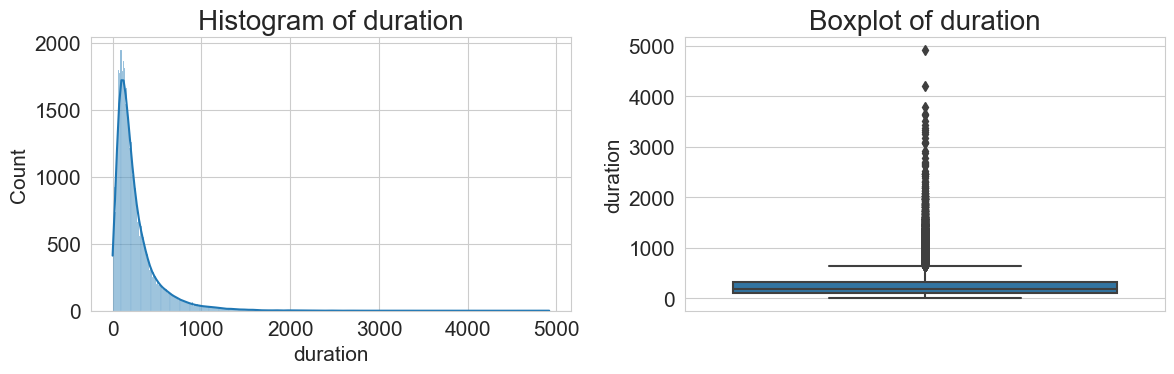

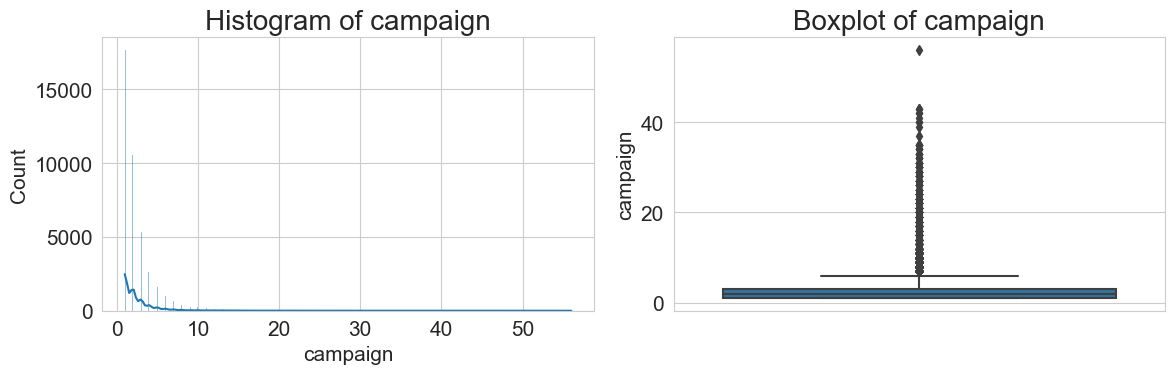

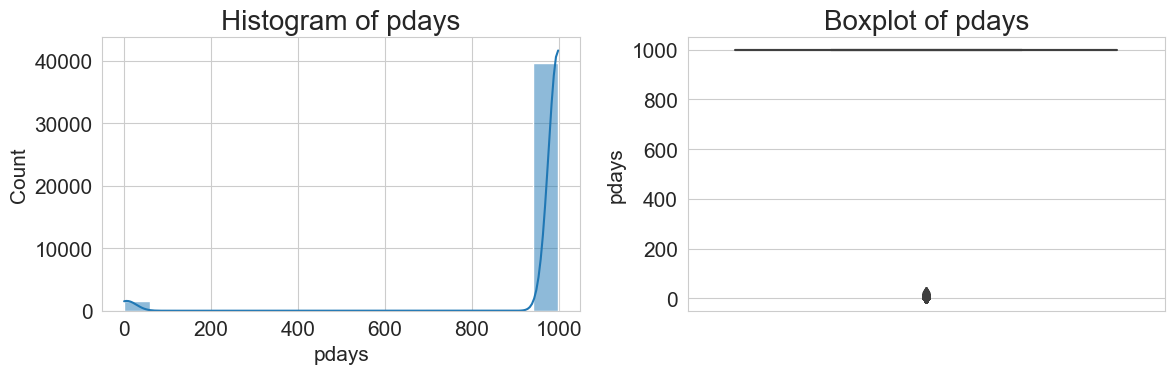

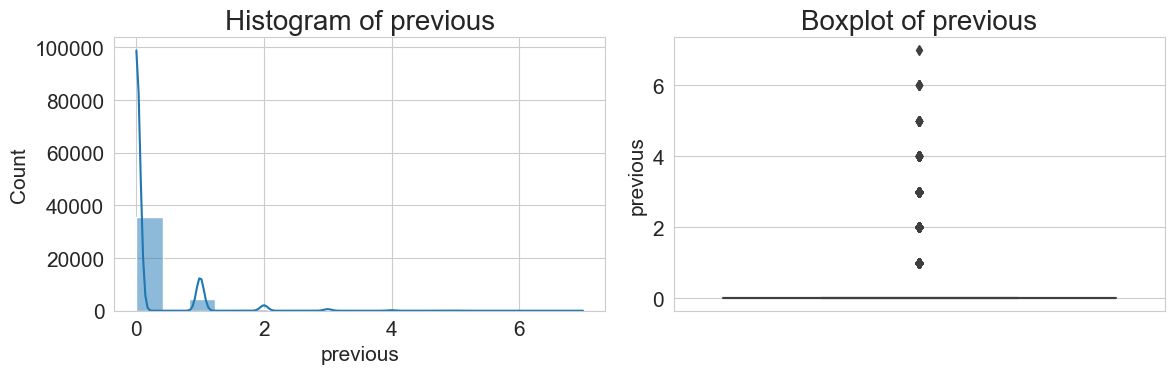

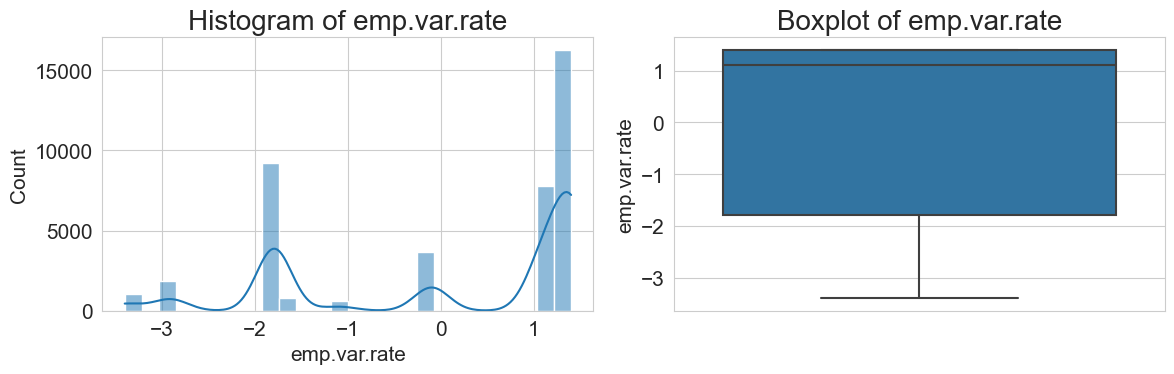

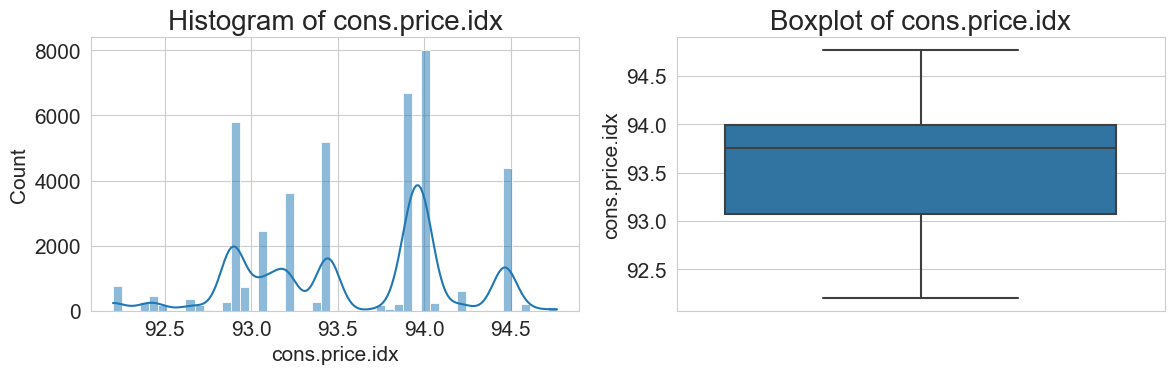

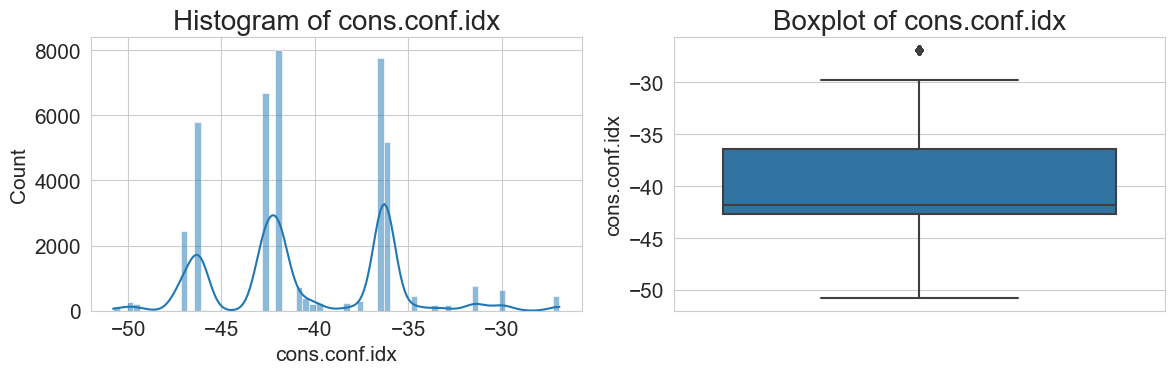

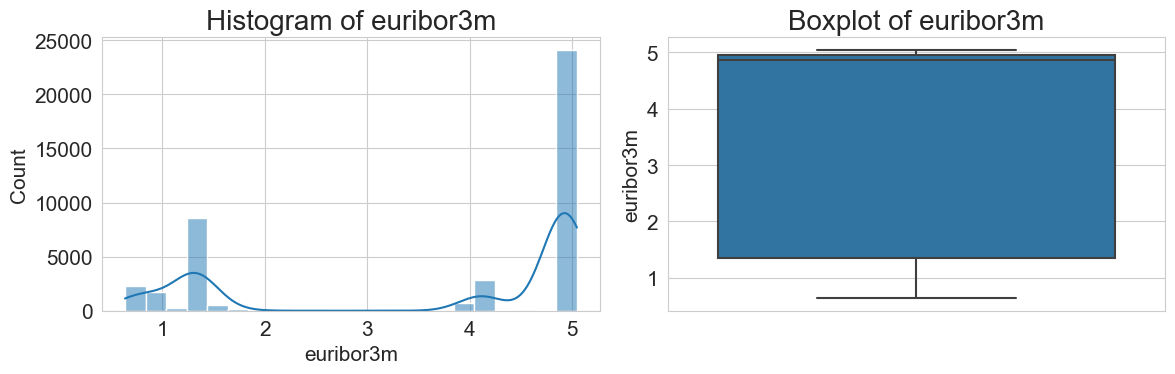

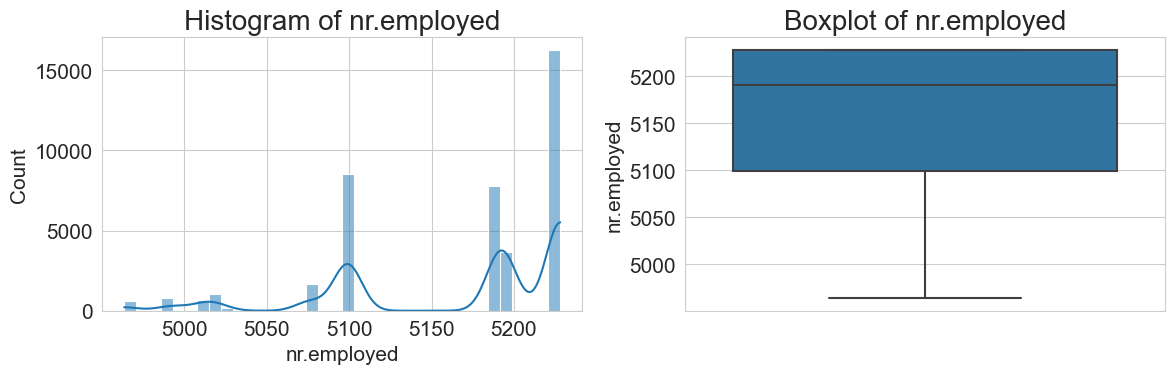

In [22]:
for var in cont_vars:
    plot_continuous(data_raw, var)

In [16]:
# look into the 'pdays' variable, sort by index
data_raw['pdays'].value_counts().sort_index()
# need to turn it into a categorical variable.
"""
NoContact: pdays=999
Pdays0_3: 0<=pdays<=3
Pdays4_7: 4<=pdays<=7
Pdays_8_14: 8<=pdays<=14
Pdays15: pdays>=15
"""

'\nNoContact: pdays=999\nPdays0_3: 0<=pdays<=3\nPdays4_7: 4<=pdays<=7\nPdays_8_14: 8<=pdays<=14\nPdays15: pdays>=15\n'

### Categorical Variables

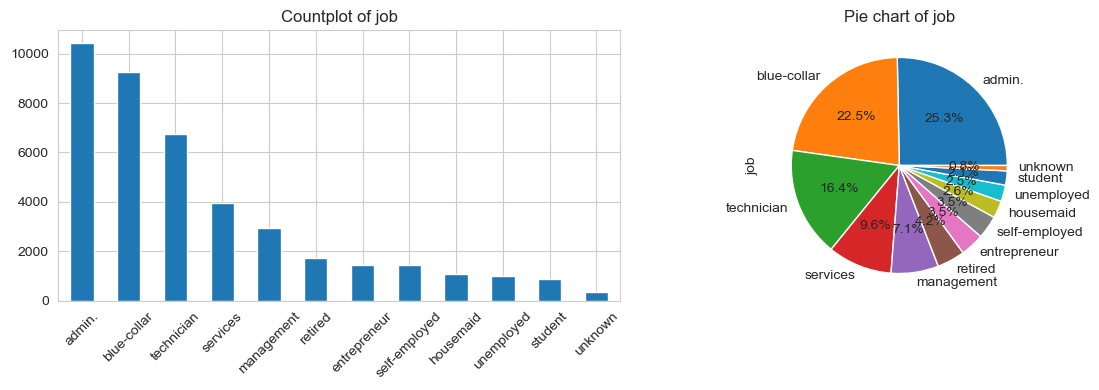

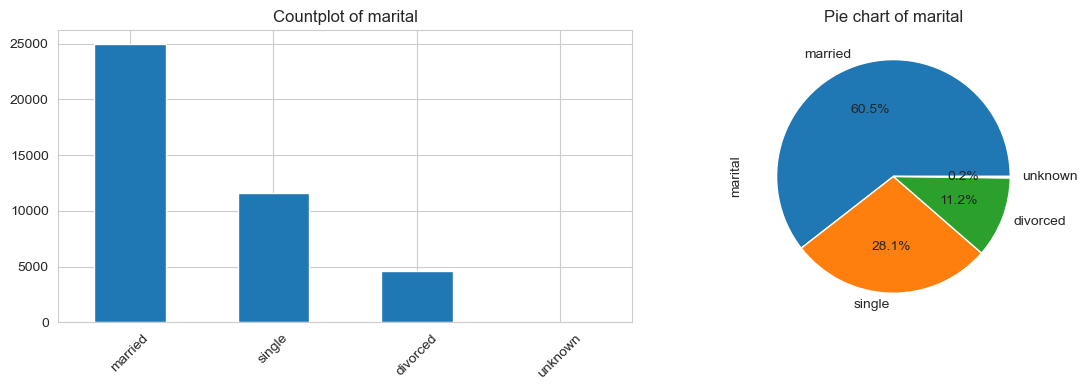

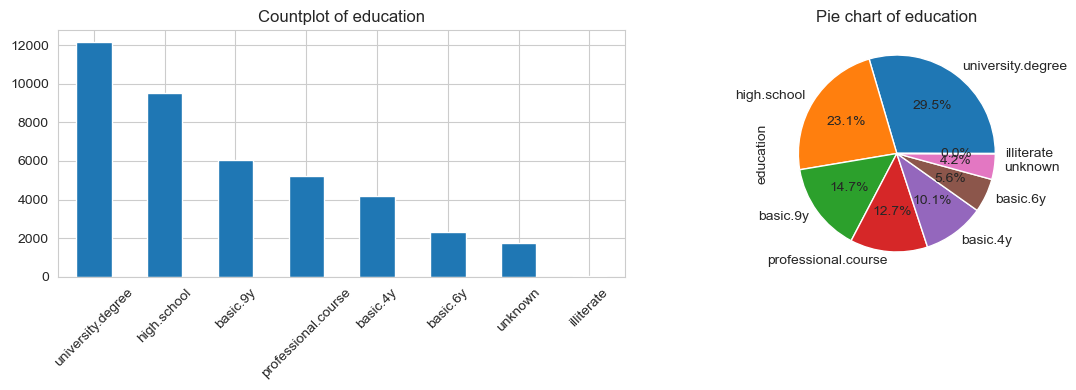

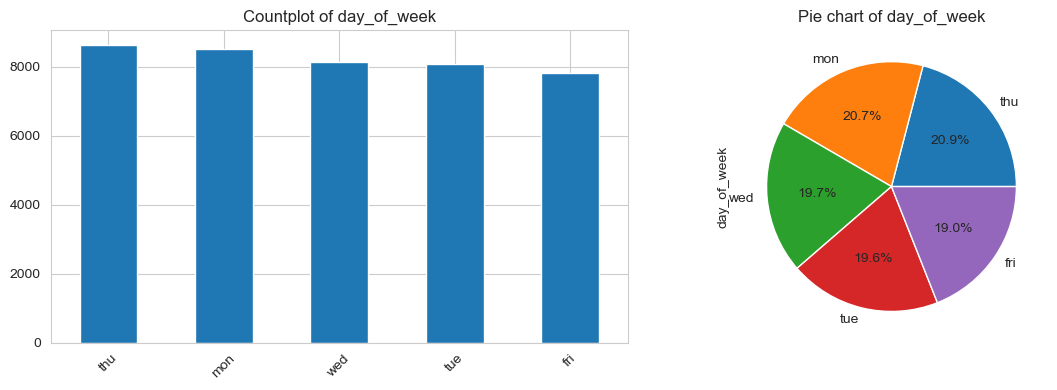

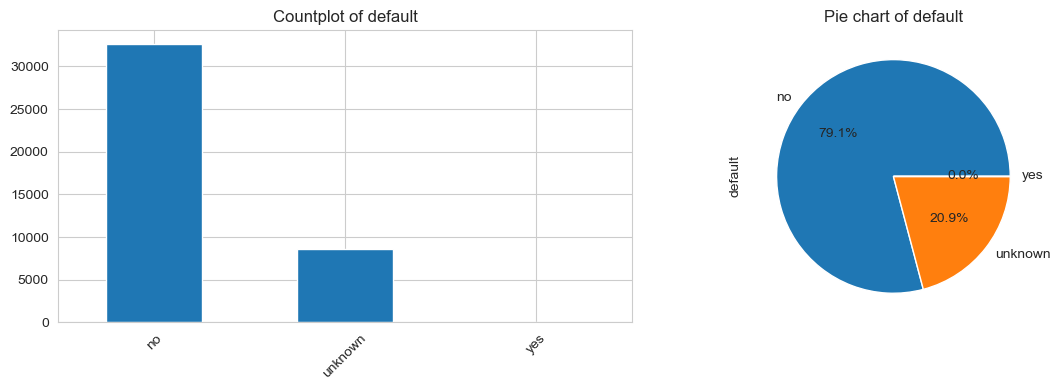

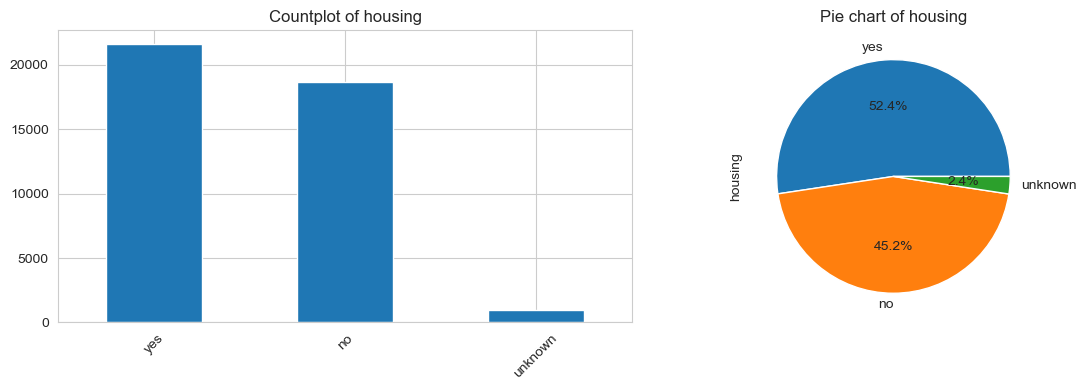

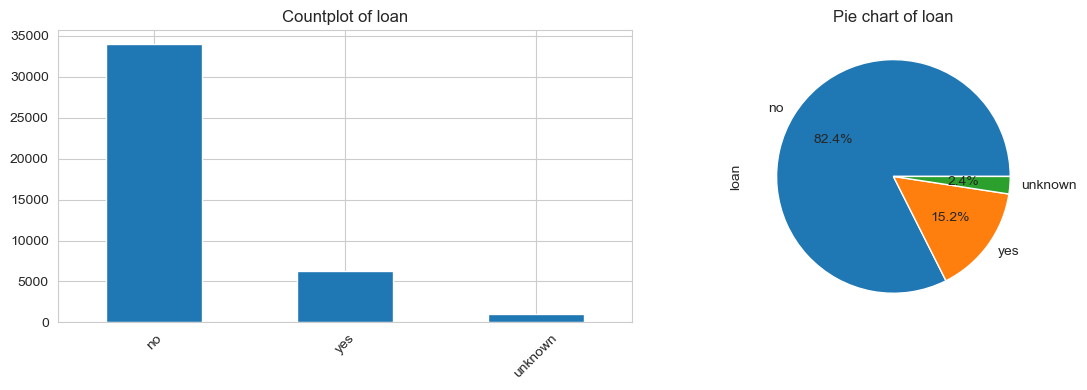

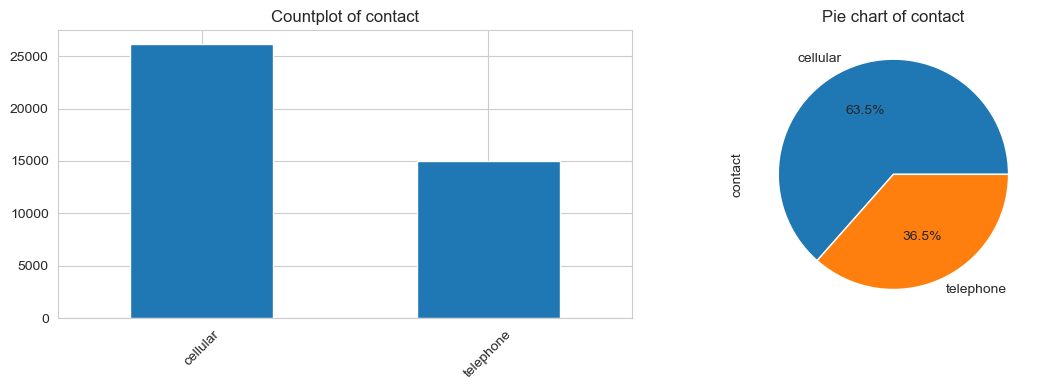

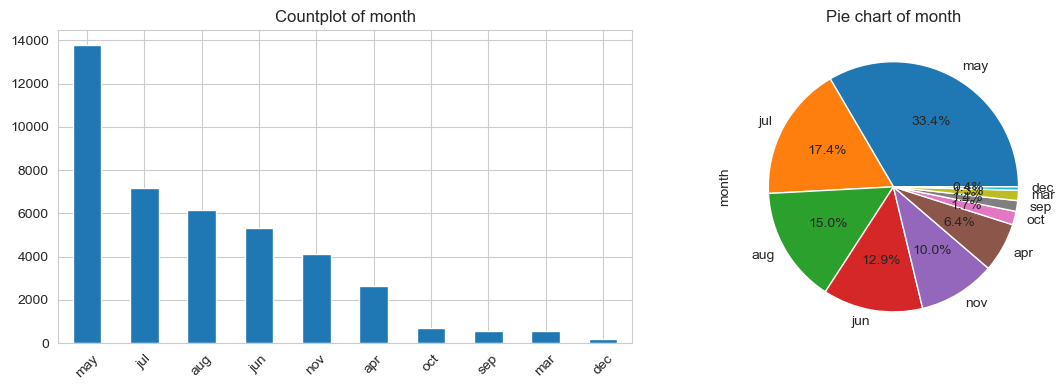

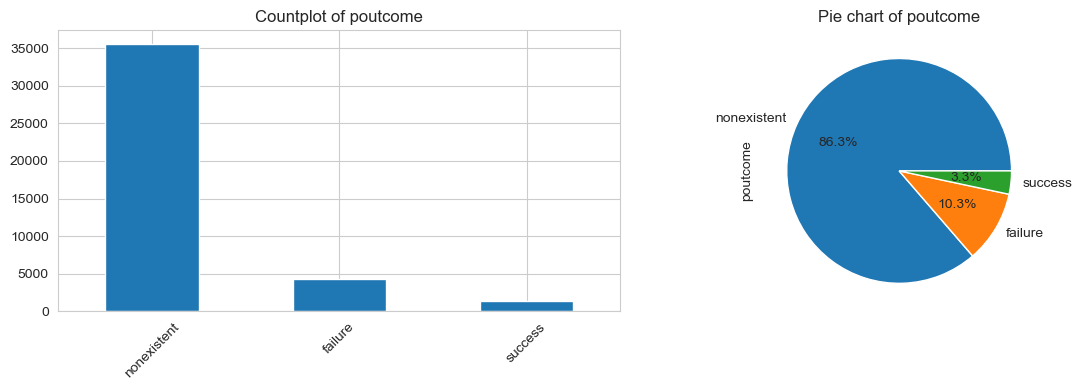

In [17]:
for var in cate_vars:
    plot_categorical(data_raw, var)